Pregunta 1

In [1]:
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv"
df = pd.read_csv(url)

# Check for null values in the "Price" column
null_values_before = df['Price'].isnull().sum()

# Drop null values in the "Price" column
df_cleaned = df.dropna(subset=['Price'])

# Calculate the percentage of data lost
data_lost_percentage = (null_values_before / len(df)) * 100

data_lost_percentage

np.float64(21.83205668875692)

Pregunta 2

In [2]:
# Check the most common property type
property_type_counts = df_cleaned['Type'].value_counts()

# Calculate the percentage of the most common property type
most_common_type = property_type_counts.idxmax()
most_common_type_percentage = (property_type_counts.max() / len(df_cleaned)) * 100

most_common_type, most_common_type_percentage

('h', np.float64(67.79461959114765))

Pregunta 3

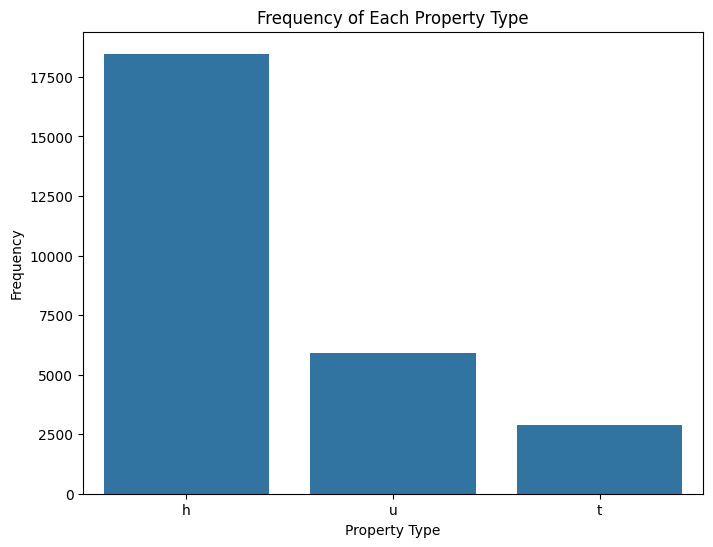

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the frequency of each property type in descending order
plt.figure(figsize=(8,6))
sns.barplot(x=property_type_counts.index, y=property_type_counts.values, order=property_type_counts.index)

plt.title('Frequency of Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.show()

Pregunta 4

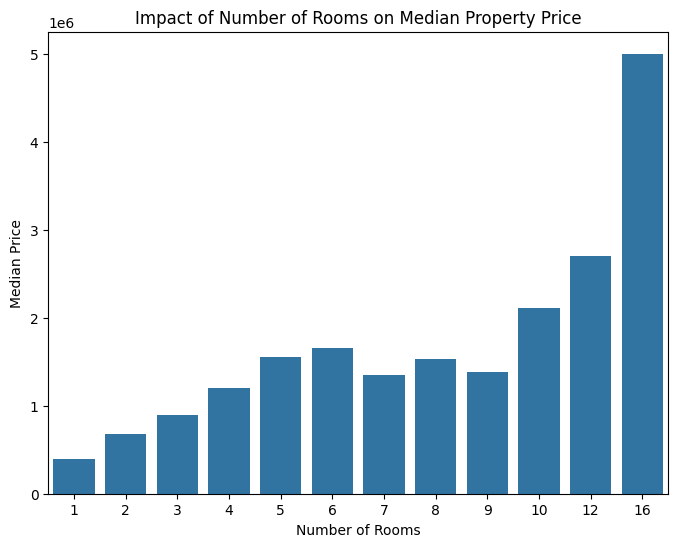

,Rooms,Price
0,1,390000.0
1,2,678000.0
2,3,900000.0
3,4,1205250.0
4,5,1550000.0
5,6,1660000.0
6,7,1350000.0
7,8,1535883.0
8,9,1380000.0
9,10,2115000.0


In [4]:
# Group the data by the number of rooms and calculate the median price for each group
rooms_median_price = df_cleaned.groupby('Rooms')['Price'].median().reset_index()

# Plot a bar chart to show the relationship between the number of rooms and median price
plt.figure(figsize=(8,6))
sns.barplot(x='Rooms', y='Price', data=rooms_median_price)

plt.title('Impact of Number of Rooms on Median Property Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price')
plt.show()

# Check the median price trend for analysis
rooms_median_price

Pregunta 5

In [5]:
# Calculate the Spearman correlation coefficient between 'Rooms' and 'Price'
spearman_corr = df_cleaned[['Rooms', 'Price']].corr(method='spearman')

# Extract the correlation value
spearman_corr_value = spearman_corr.loc['Rooms', 'Price']
spearman_corr_value

np.float64(0.5042971590926004)

Pregunta 6

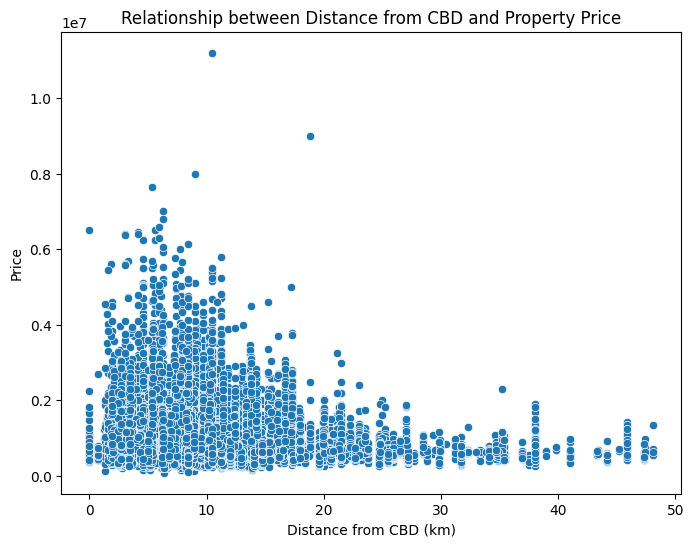

np.float64(-0.21138434279157978)

In [6]:
# Scatter plot para visualizar la relación entre la distancia y el precio
plt.figure(figsize=(8,6))
sns.scatterplot(x='Distance', y='Price', data=df_cleaned)

plt.title('Relationship between Distance from CBD and Property Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price')
plt.show()

# Calcular el coeficiente de correlación (Pearson o Spearman)
correlation = df_cleaned[['Distance', 'Price']].corr(method='pearson')  # Puedes cambiar a 'spearman' si prefieres
correlation_value = correlation.loc['Distance', 'Price']
correlation_value

Pregunta 7

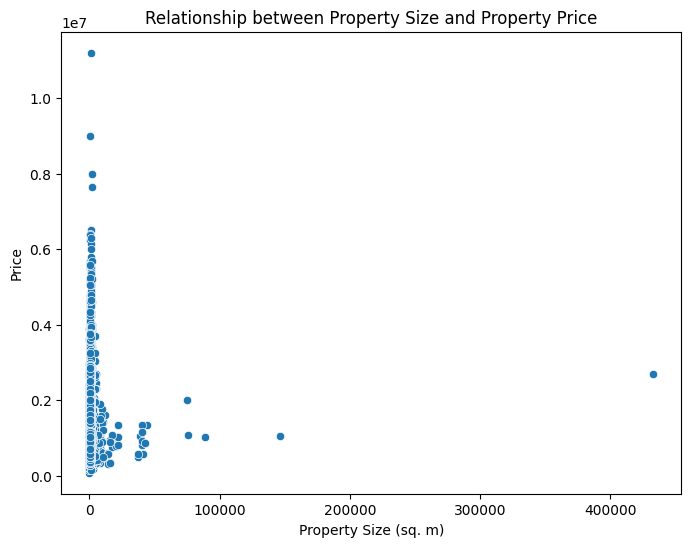

np.float64(0.03274836524947102)

In [9]:
# Scatter plot para visualizar la relación entre el tamaño de la propiedad y el precio
plt.figure(figsize=(8,6))
sns.scatterplot(x='Landsize', y='Price', data=df_cleaned)

plt.title('Relationship between Property Size and Property Price')
plt.xlabel('Property Size (sq. m)')
plt.ylabel('Price')
plt.show()

# Calcular el coeficiente de correlación (Pearson o Spearman)
correlation = df_cleaned[['Landsize', 'Price']].corr(method='pearson')
correlation_value = correlation.loc['Landsize', 'Price']
correlation_value

Pregunta 8

C:\Users\djjoa\AppData\Local\Temp\ipykernel_27552\1506160274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Landsize_Category'] = pd.qcut(df_cleaned['Landsize'], q=7, labels=False)


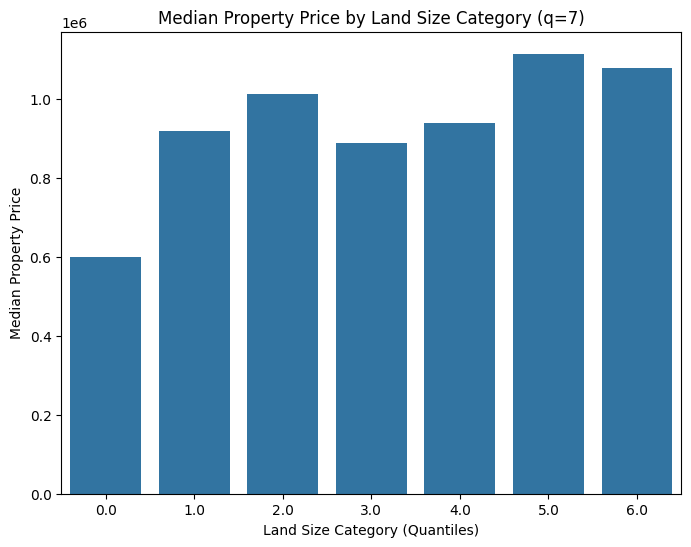

In [10]:
# Discretize Landsize into 7 quantile categories
df_cleaned['Landsize_Category'] = pd.qcut(df_cleaned['Landsize'], q=7, labels=False)

# Calculate median price for each land size category
median_price_by_landsize = df_cleaned.groupby('Landsize_Category')['Price'].median().reset_index()

# Plot the relationship with a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='Landsize_Category', y='Price', data=median_price_by_landsize)

plt.title('Median Property Price by Land Size Category (q=7)')
plt.xlabel('Land Size Category (Quantiles)')
plt.ylabel('Median Property Price')
plt.show()

Pregunta 9

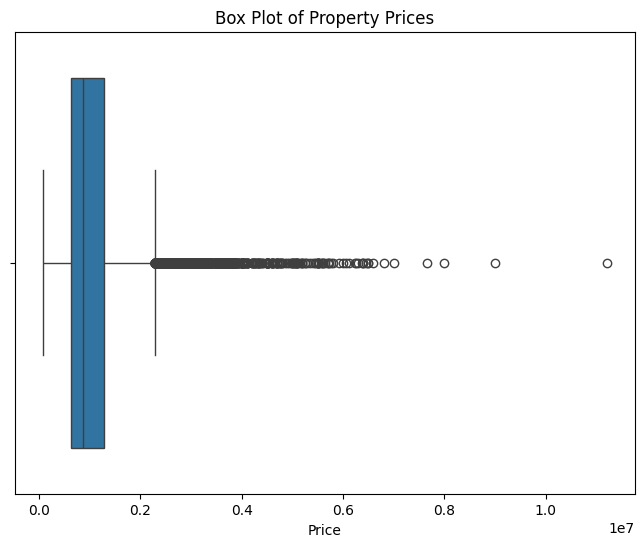

Percentage of properties identified as outliers: 4.69%


In [11]:
# Crear un box plot para visualizar outliers en la columna 'Price'
plt.figure(figsize=(8,6))
sns.boxplot(x=df_cleaned['Price'])
plt.title('Box Plot of Property Prices')
plt.xlabel('Price')
plt.show()

# Calcular los límites superior e inferior utilizando el método de Tukey
Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para crear uno nuevo sin outliers
df_no_outliers = df_cleaned[(df_cleaned['Price'] >= lower_bound) & (df_cleaned['Price'] <= upper_bound)]

# Calcular el porcentaje de propiedades identificadas como outliers
outliers_count = df_cleaned.shape[0] - df_no_outliers.shape[0]
total_properties = df_cleaned.shape[0]
outliers_percentage = (outliers_count / total_properties) * 100

print(f'Percentage of properties identified as outliers: {outliers_percentage:.2f}%')

Pregunta 10

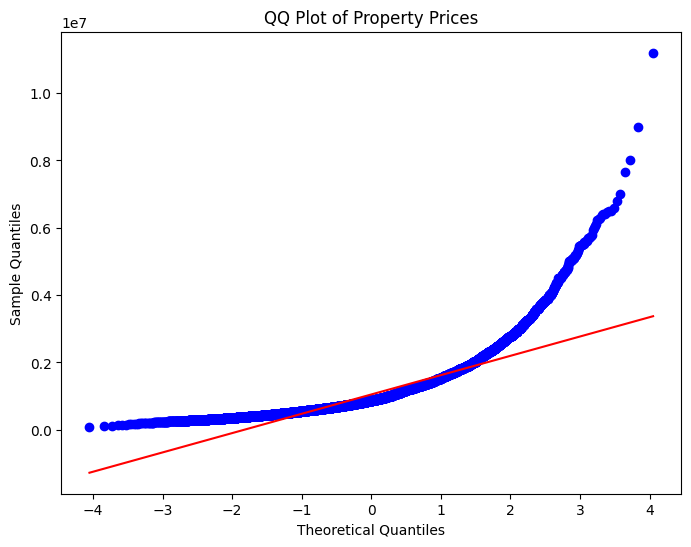

Skewness: 2.59
Kurtosis: 13.10


In [12]:
import numpy as np
import scipy.stats as stats

# Crear un QQ plot para comparar la distribución de precios con una distribución normal
plt.figure(figsize=(8,6))
stats.probplot(df_cleaned['Price'], dist="norm", plot=plt)
plt.title('QQ Plot of Property Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Calcular la asimetría y la curtosis
skewness = df_cleaned['Price'].skew()
kurtosis = df_cleaned['Price'].kurtosis()

print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')

Pregunta 11

In [13]:
# Realizar el test Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(df_cleaned['Price'], 'norm', args=(df_cleaned['Price'].mean(), df_cleaned['Price'].std()))

print(f'KS Statistic: {ks_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Conclusión
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    conclusion = "The distribution of property prices is significantly different from a normal distribution."
else:
    conclusion = "The distribution of property prices is not significantly different from a normal distribution."

print(conclusion)

KS Statistic: 0.1375
P-value: 0.0000
The distribution of property prices is significantly different from a normal distribution.


Pregunta 12

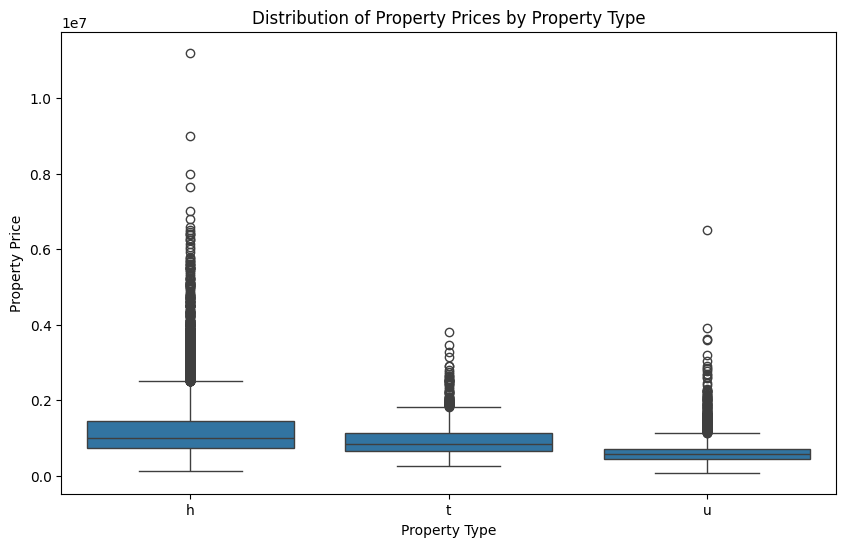

In [14]:
# Crear un box plot para visualizar la distribución de precios por tipo de propiedad
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df_cleaned)

plt.title('Distribution of Property Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Property Price')
plt.show()

Pregunta 13

In [15]:
# Calcular la mediana de precios por región
median_price_by_region = df_cleaned.groupby('Regionname')['Price'].median().reset_index()

# Ordenar por la mediana de precios
median_price_by_region = median_price_by_region.sort_values(by='Price', ascending=False)

# Mostrar las 5 regiones con los precios medianos más altos y más bajos
print(median_price_by_region)

                   Regionname      Price
5       Southern Metropolitan  1250000.0
0        Eastern Metropolitan  1015000.0
4  South-Eastern Metropolitan   811250.0
2       Northern Metropolitan   752500.0
6        Western Metropolitan   750000.0
1            Eastern Victoria   679000.0
3           Northern Victoria   565000.0
7            Western Victoria   412125.0


Pregunta 14

Paso 1: Dividir el Precio en Rangos

In [16]:
# Crear rangos para la variable 'Price'
bins = [0, 500000, 750000, 1000000, 1250000, float('inf')]
labels = ['0-500k', '500k-750k', '750k-1M', '1M-1.25M', '1.25M+']
df_cleaned['Price_Range'] = pd.cut(df_cleaned['Price'], bins=bins, labels=labels)

# Comprobar los primeros registros
print(df_cleaned[['Price', 'Price_Range']].head())

       Price Price_Range
1  1480000.0      1.25M+
2  1035000.0    1M-1.25M
4  1465000.0      1.25M+
5   850000.0     750k-1M
6  1600000.0      1.25M+


C:\Users\djjoa\AppData\Local\Temp\ipykernel_27552\496190541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price_Range'] = pd.cut(df_cleaned['Price'], bins=bins, labels=labels)


Paso 2: Realizar la Prueba Chi-cuadrado

In [17]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_cleaned['Regionname'], df_cleaned['Price_Range'])

# Realizar la prueba Chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2_stat}, P-value: {p_value}, Degrees of Freedom: {dof}")

Chi2 Statistic: 5442.551240671333, P-value: 0.0, Degrees of Freedom: 28


Paso 3: Calcular Cramér's V

In [18]:
import numpy as np

# Calcular Cramér's V
cramers_v = np.sqrt(chi2_stat / (df_cleaned.shape[0] * (min(contingency_table.shape)-1)))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.22346624001734688


Pregunta 15

In [21]:
# Asegúrate de que la columna 'Date' está en formato de fecha
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Verifica si hay valores NaT (Not a Time) después de la conversión
print("Cantidad de valores no convertibles a fecha:", df_cleaned['Date'].isna().sum())

# Si no hay NaT, continúa
if df_cleaned['Date'].isna().sum() == 0:
    # Agregar la columna del año
    df_cleaned['Year'] = df_cleaned['Date'].dt.year

    # Calcular el precio medio por año
    median_price_by_year = df_cleaned.groupby('Year')['Price'].median()

    # Obtener los precios medianos para los años más antiguo y más reciente
    earliest_year = median_price_by_year.idxmin()
    latest_year = median_price_by_year.idxmax()
    median_price_earliest = median_price_by_year[earliest_year]
    median_price_latest = median_price_by_year[latest_year]

    print(f"Año más antiguo: {earliest_year}, Precio medio: {median_price_earliest}")
    print(f"Año más reciente: {latest_year}, Precio medio: {median_price_latest}")

    # Calcular el porcentaje de cambio
    percentage_change = ((median_price_latest - median_price_earliest) / median_price_earliest) * 100
    print(f"Porcentaje de cambio en el precio medio de {earliest_year} a {latest_year}: {percentage_change:.2f}%")
else:
    print("Hay valores que no se pudieron convertir a fecha. Revisa los datos.")

Cantidad de valores no convertibles a fecha: 16787
Hay valores que no se pudieron convertir a fecha. Revisa los datos.


C:\Users\djjoa\AppData\Local\Temp\ipykernel_27552\348594481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')


In [23]:
# Verificar los años únicos en el DataFrame
df_cleaned['Year'] = df_cleaned['Date'].dt.year
unique_years = df_cleaned['Year'].unique()
print(unique_years)

[2016. 2017.   nan 2018.]


C:\Users\djjoa\AppData\Local\Temp\ipykernel_27552\1312138843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year  # Asegúrate de que 'Date' es el nombre correcto de la columna con las fechas


In [24]:
# Calcular el precio medio por año
median_price_by_year = df_cleaned.groupby('Year')['Price'].median()

# Obtener los precios medianos para los años más antiguo y más reciente
earliest_year = median_price_by_year.idxmin()
latest_year = median_price_by_year.idxmax()
median_price_earliest = median_price_by_year[earliest_year]
median_price_latest = median_price_by_year[latest_year]

print(f"Earliest Year: {earliest_year}, Median Price: {median_price_earliest}")
print(f"Latest Year: {latest_year}, Median Price: {median_price_latest}")

Earliest Year: 2018.0, Median Price: 800000.0
Latest Year: 2016.0, Median Price: 900000.0


In [25]:
# Calcular el porcentaje de cambio
percentage_change = ((median_price_latest - median_price_earliest) / median_price_earliest) * 100
print(f"Percentage change in median price from {earliest_year} to {latest_year}: {percentage_change:.2f}%")


Percentage change in median price from 2018.0 to 2016.0: 12.50%


Pregunta 16

C:\Users\djjoa\AppData\Local\Temp\ipykernel_27552\593477991.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
C:\Users\djjoa\AppData\Local\Temp\ipykernel_27552\593477991.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Date'].dt.month
C:\Users\djjoa\AppData\Local\Temp\ipykernel_27552\593477991.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

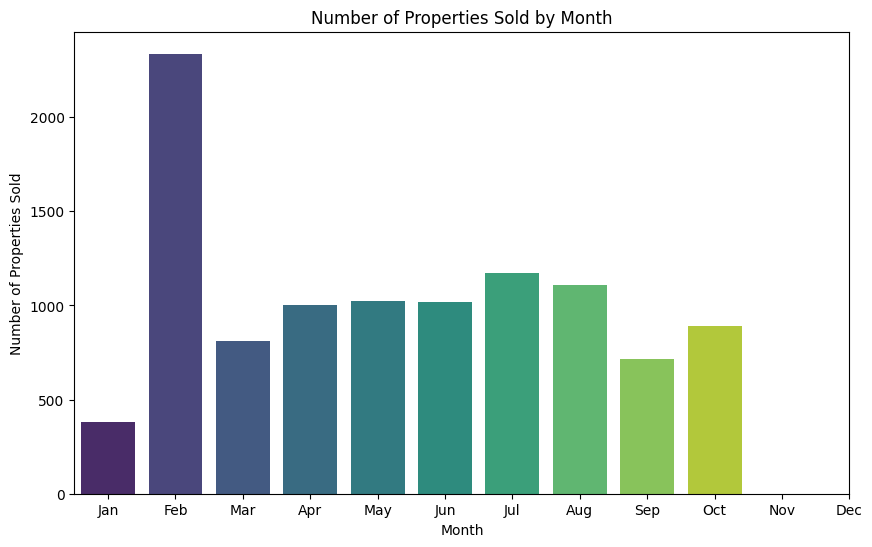

The month with the most properties sold is 3.0 with 2337.0 sales.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Extraer el mes de la columna de fechas
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Agrupar por mes y contar el número de propiedades vendidas
monthly_sales = df_cleaned.groupby('Month').size().reset_index(name='Number of Sales')

# Visualizar el resultado
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Number of Sales', data=monthly_sales, palette='viridis')
plt.title('Number of Properties Sold by Month')
plt.xlabel('Month')
plt.ylabel('Number of Properties Sold')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Mostrar el mes con más ventas
most_sales_month = monthly_sales.loc[monthly_sales['Number of Sales'].idxmax()]
print(f"The month with the most properties sold is {most_sales_month['Month']} with {most_sales_month['Number of Sales']} sales.")
